# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs3/20250325_sparc4acs3_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs3/20250325_s4c3_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs3/20250325_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs3/20250325_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs3/20250325_s4c3_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:15.822000,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L4,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:17.242063,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L4,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:18.662126,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L4,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:20.082189,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L4,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:21.502251,0.3,0,0,DOMEFLAT,FLAT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L4,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:02:58.904000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,12,L4,None,True
1495,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:04:41.303000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,13,L4,None,True
1496,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:06:23.706000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,14,L4,None,True
1497,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:08:06.110000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs3/20250325_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   83R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   83R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   83R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   83R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   83R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

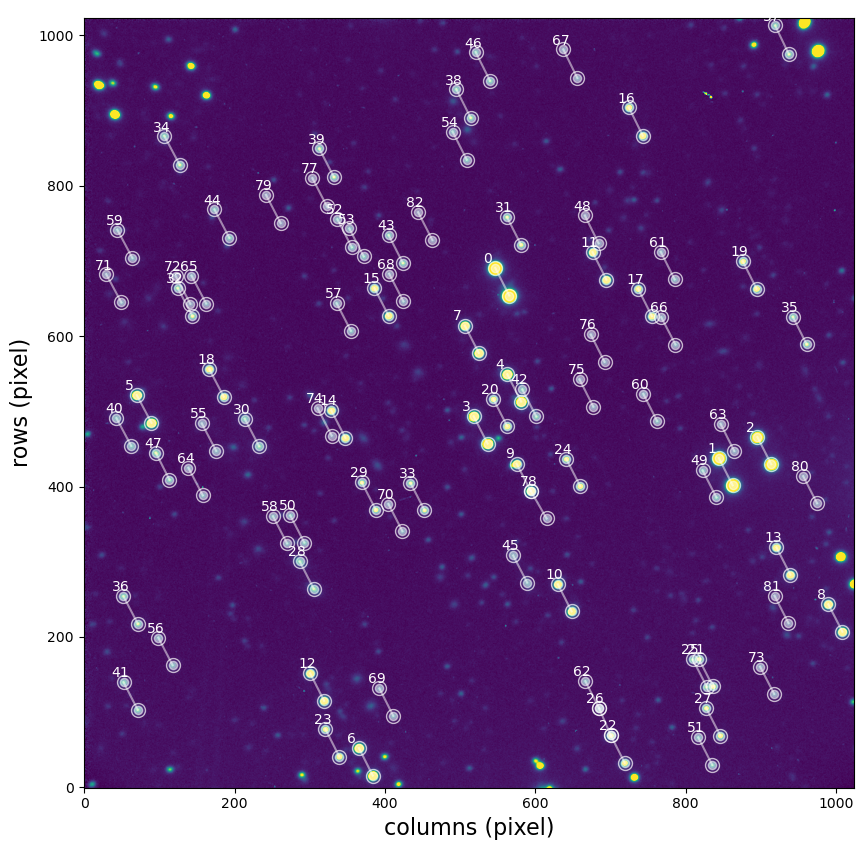

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.564719,-38.693907,565.306440,654.031749,6.531907,6.531907,-10.264244,0.001083,-8.610993,0.000779,10,0
1,1,189.527428,-38.716334,862.425102,401.710401,6.482167,6.482167,-10.021866,0.001256,-8.619787,0.001007,10,0
2,2,189.521397,-38.713451,913.757101,429.630394,6.484336,6.484336,-9.673098,0.001543,-8.623624,0.000953,10,0
3,3,189.567081,-38.712657,536.478286,457.216606,6.425058,6.425058,-9.049079,0.002281,-8.612751,0.000836,10,0
4,4,189.562002,-38.707171,581.158621,513.036732,6.400045,6.400045,-8.989333,0.002367,-8.612899,0.000795,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,78,189.557380,-38.721641,614.973960,357.543273,6.414839,6.414839,-8.205041,0.004140,-8.614231,0.000760,10,0
79,79,189.602045,-38.686192,261.244191,750.418590,6.269624,6.269624,-5.087803,0.058565,-8.606223,0.000679,10,0
80,80,189.513754,-38.718059,974.671227,377.754828,5.904279,5.904279,-5.057605,0.063367,-8.634868,0.000932,10,0
81,81,189.517453,-38.733247,936.687663,218.335399,5.375989,5.375989,-5.013874,0.065257,-8.624505,0.000900,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

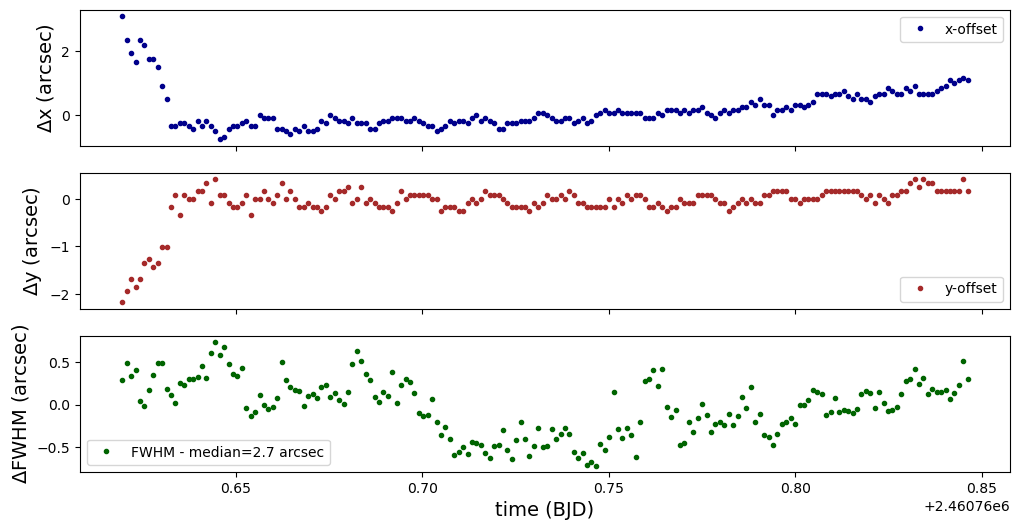

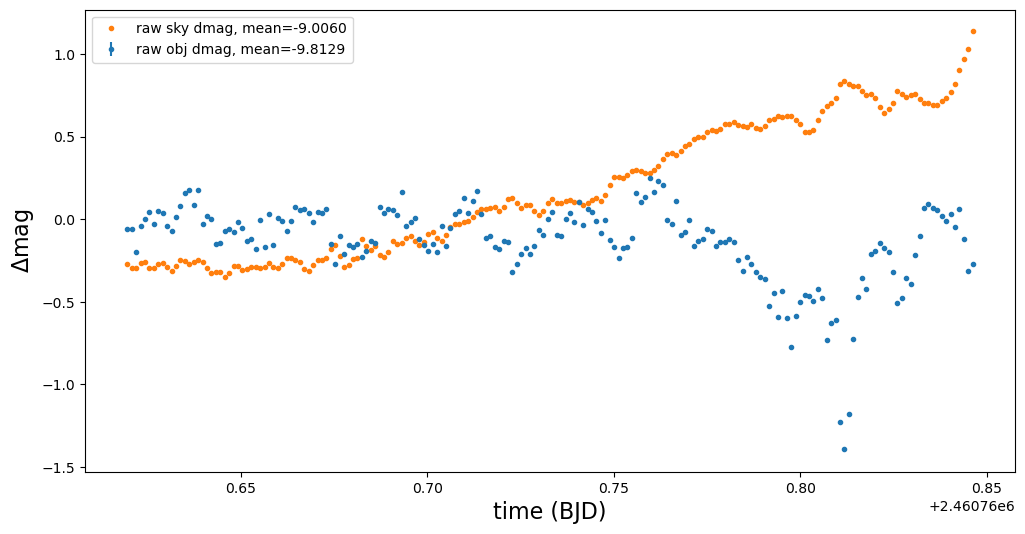

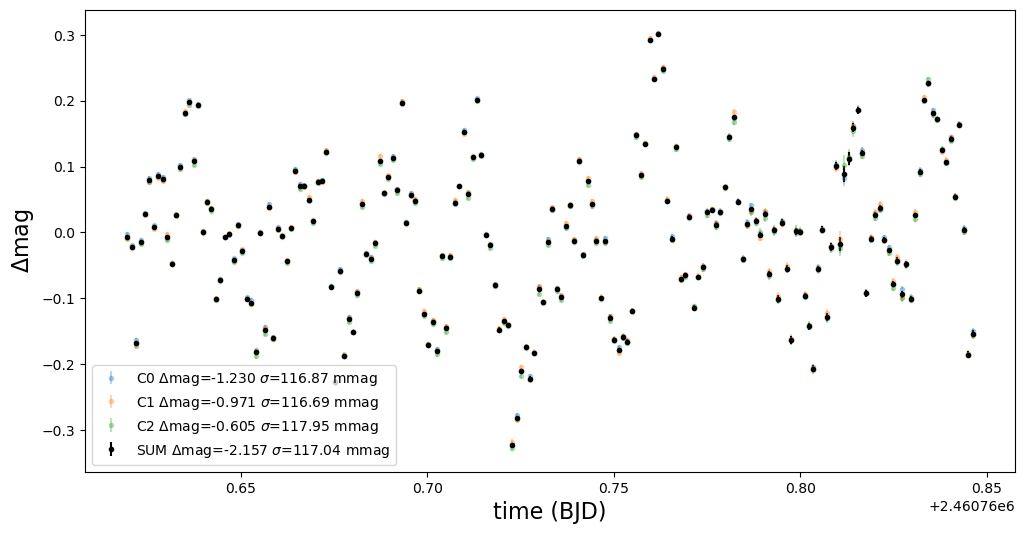

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
2460760.6195786176 527.2508790436162 ... -0.006397015223257085
2460760.6207662355 525.0008790436162 ...  -0.02204963108313507
 2460760.621951503 523.7508790436162 ...  -0.16782325256878394
 2460760.623136818 523.0008790436162 ... -0.014351876927941376
 2460760.624324331 525.0008790436162 ...   0.02769245554427968
2460760.6255096225 524.5008790436162 ...   0.07901592386183687
2460760.6266971584 523.2508790436162 ...  0.007841716711791236
               ...               ... ...                   ...
  2460760.83906005 520.5008790436162 ...     0.106337550385593
2460760.8402469833 520.7508790436162 ...   0.14251099489585073
 2460760.841434611 521.2508790436162 ...   0.05434976242136358
2460760.8426198186 521.0008790436162 ...    0.1634086173890772
2460760.8438050738 521.2508790436162 ...  0.003504547175259276
2460760.8449903396 521.5008790436162 ...   -0.185567862

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=3
comps=[0,1,2]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs3/20250325_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1179   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1618   83R x 803C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0189', 'EFE0189', 'FO0190', 'EFO0190', 'FE0190', 'EFE0190', 'FO0191',
       'EFO0191', 'FE0191', 'EFE0191'],
      dtype='object', length=803)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 01:12:02,744 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 01:12:02,744 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 01:12:02,757 root - INFO - Source index: i=3   [pipeline_lib]


2025-09-18 01:12:02,757 | INFO | Source index: i=3 


2025-09-18 01:12:02,757 root - INFO - Source RA=189.5670811759039 Dec=-38.712657147798005 mag=-15.4640+-0.0002  [pipeline_lib]


2025-09-18 01:12:02,757 | INFO | Source RA=189.5670811759039 Dec=-38.712657147798005 mag=-15.4640+-0.0002


2025-09-18 01:12:02,758 root - INFO - Best aperture radius: 8.0 pixels  [pipeline_lib]


2025-09-18 01:12:02,758 | INFO | Best aperture radius: 8.0 pixels


2025-09-18 01:12:02,759 root - INFO - Polarization in Q: 0.0001+-0.0004  [pipeline_lib]


2025-09-18 01:12:02,759 | INFO | Polarization in Q: 0.0001+-0.0004


2025-09-18 01:12:02,761 root - INFO - Polarization in U: -0.0012+-0.0006  [pipeline_lib]


2025-09-18 01:12:02,761 | INFO | Polarization in U: -0.0012+-0.0006


2025-09-18 01:12:02,761 root - INFO - Polarization in V: 0.0002+-0.0003  [pipeline_lib]


2025-09-18 01:12:02,761 | INFO | Polarization in V: 0.0002+-0.0003


2025-09-18 01:12:02,762 root - INFO - Total linear polarization p: 0.0012+-0.0006  [pipeline_lib]


2025-09-18 01:12:02,762 | INFO | Total linear polarization p: 0.0012+-0.0006


2025-09-18 01:12:02,764 root - INFO - Angle of polarization theta: 140+-10 deg  [pipeline_lib]


2025-09-18 01:12:02,764 | INFO | Angle of polarization theta: 140+-10 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 01:12:02,765 root - INFO - Free constant k: 0.8491415114853613+-0.0  [pipeline_lib]


2025-09-18 01:12:02,765 | INFO | Free constant k: 0.8491415114853613+-0.0


2025-09-18 01:12:02,766 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 01:12:02,766 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 01:12:02,767 root - INFO - RMS of zi residuals: 0.0035622900549036047  [pipeline_lib]


2025-09-18 01:12:02,767 | INFO | RMS of zi residuals: 0.0035622900549036047


2025-09-18 01:12:02,767 root - INFO - Reduced chi-square (n=192.0, DOF=189.0): 1.68  [pipeline_lib]


2025-09-18 01:12:02,767 | INFO | Reduced chi-square (n=192.0, DOF=189.0): 1.68


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 01:12:02,846 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:12:02,846 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:12:02,851 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:12:02,851 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:12:03,068 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:12:03,068 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:12:03,074 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:12:03,074 | INFO | Substituting symbol \perp from STIXGeneral


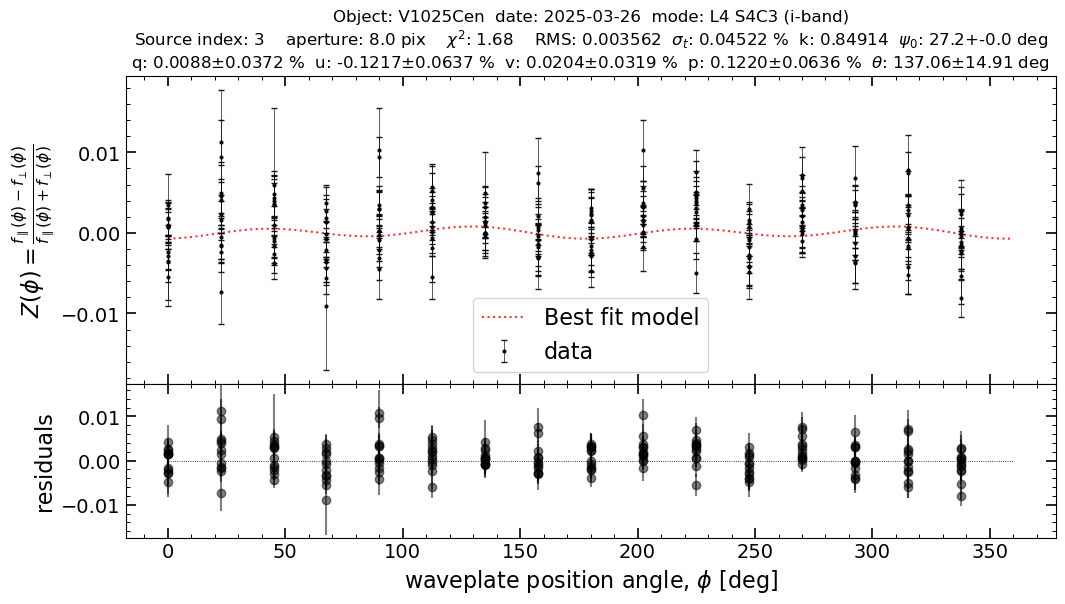

In [11]:
source_index = 3

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs3/20250325_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 3
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 2
APERTURE_RADIUS : 8.0
NEXPS : 192
MAG : -15.4640+-0.0002
RA : 189.5670811759039
DEC : -38.712657147798005
FWHM : 5.637530864862786
X1 : 518.0234716706813
Y1 : 493.44445852179905
X2 : 536.4782864165512
Y2 : 457.2166055777614
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.12+-0.06 %  Angle of polarization: 140+-10 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

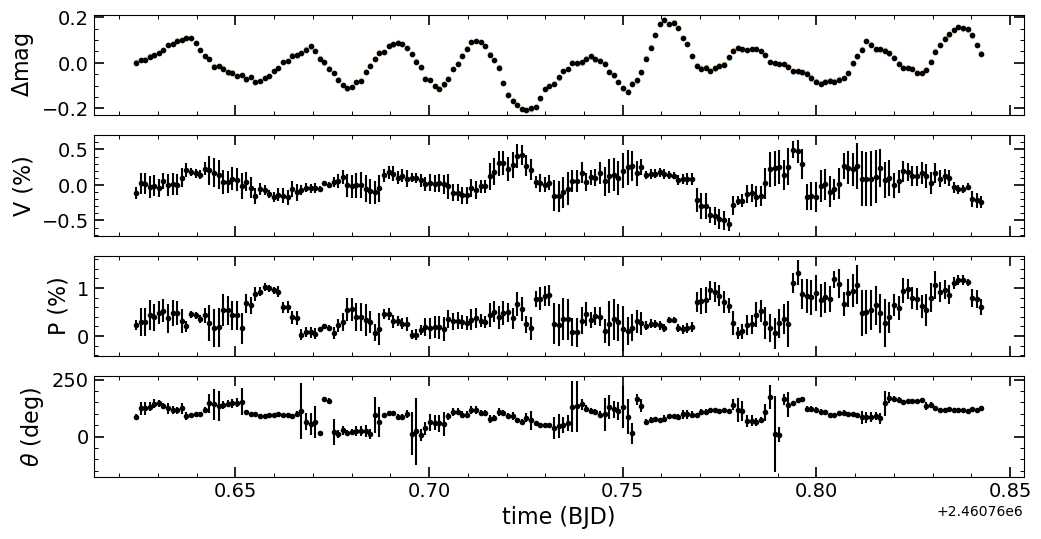

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.002387281411376563,0.0009525601601185414,-0.0007494501314795343,0.000984726426381274,0.0018695224042719616,0.0010512707068687864,2460760.6243092315,518.0234716706813,493.44445852179905,536.4782864165512,457.2166055777614,6.290152472771753,-12.135369342695746,0.0008900746757059577,-14.291556347337284,0.000778156994172703,0.0009282522169193896,0.002350318951130637,0.0010394979637443932,84.28808779125188,12.649194590712039
0.013433214380997427,0.000945705167619835,0.010498249966522266,0.0009780590279024309,0.013208374545268242,0.0010450698185290675,2460760.625495825,515.7734716706813,494.19445852179905,534.2282864165512,457.9666055777614,6.374263055165879,-12.147906508184622,0.0008827782267444425,-14.292909579100305,0.0007779694459826165,0.01211218594277419,0.00290437773387835,0.0028966668370394716,123.92082748489841,28.524069225906977
0.014864622202244604,0.0009439307574772701,0.013050323969931554,0.0009764864206490029,0.014603394321985874,0.0010431758805976106,2460760.6266812375,514.5234716706813,494.94445852179905,532.9782864165512,458.7166055777614,6.374263055165879,-12.149935432462769,0.000880870219790426,-14.293139505784252,0.0007777852468022356,0.013911183536974292,0.0029458687899881143,0.00290688562671613,123.68446417505173,28.221531524632756
0.02786061999371725,0.0009337023855650091,0.026644071996907215,0.0009666060695242076,0.028406992138132026,0.0010335771644281713,2460760.6278662165,513.7734716706813,494.44445852179905,532.2282864165512,458.2166055777614,6.212091100648654,-12.1643024475193,0.0008701596166866036,-14.294116258826628,0.0007764508469579222,0.027301445551128012,0.00434015030749827,0.0030563783521544968,130.53599684834896,20.140413275687795
0.03255054572017002,0.000930796057372174,0.031860618466110324,0.0009636484583471084,0.03350183213819946,0.0010301282306860921,2460760.629052613,515.7734716706813,494.94445852179905,534.2282864165512,458.7166055777614,6.008442994894487,-12.171082141335287,0.0008673000579745924,-14.295932246942463,0.0007742968756637257,0.0322651512512806,0.00386809427215217,0.002886113317162474,144.67279783855295,21.33940774533417
0.042007847035820944,0.0009241504573426944,0.041182130975604636,0.0009571676564883809,0.042315875729164176,0.0010240880365754814,2460760.6302378867,515.2734716706813,495.94445852179905,533.7282864165512,459.7166055777614,6.008442994894487,-12.181869038625626,0.0008603267852556076,-14.297461615476282,0.0007736237876425788,0.04152268000780168,0.004837326216425465,0.002449689123927659,145.81876232769167,14.483436884292376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1433215049931409,0.001315209214585662,0.14591175195646144,0.0013688542612421111,0.14595629789243247,0.0014798799744851954,2460760.8354842514,511.02347167068126,500.94445852179905,529.4782864165512,464.7166055777614,6.150295308173639,-12.172859119312687,0.0012237217946847562,-14.185435063562203,0.001140656351919622,0.14453931260894137,0.011060105450076269,0.0012588979462638302,114.49830052991896,3.2553470150591797
0.15583999589486197,0.001286798777739603,0.15787953290443113,0.0013404602709923773,0.15843475006955288,0.0014508651426880287,2460760.836670339,511.52347167068126,501.19445852179905,529.9782864165512,464.9666055777614,6.050134146225656,-12.200773922929526,0.0011954089097755,-14.201025482774078,0.001127247581526037,0.15686369701390568,0.01168006172886514,0.0010858832823649651,115.03763516056023,2.6589124780811835


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=3, 
                             comps=[0,1,2], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)